<a href="https://www.kaggle.com/code/mikedelong/appl-price-python-eda?scriptVersionId=137681830" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='../input/apple-stock-prices/AAPL_data.csv', parse_dates=['date'], index_col=['date'],
                 usecols=['date', 'open', 'high', 'low', 'close', 'volume', ])
df.head()

,open,high,low,close,volume
date,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='date', ylabel='volume'>

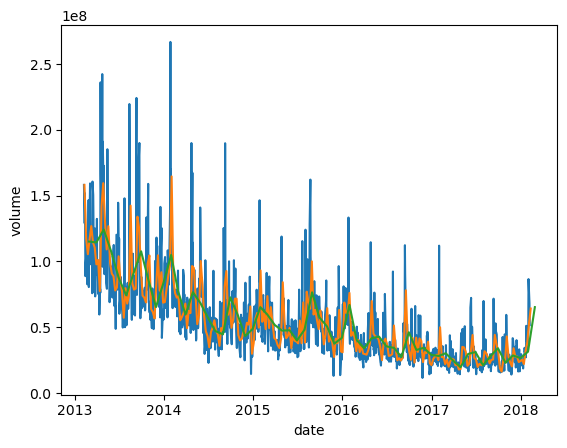

In [2]:
%matplotlib inline
from seaborn import lineplot
lineplot(data=df, x='date', y='volume')
lineplot(data=df.resample('W').mean(), x='date', y='volume')
lineplot(data=df.resample('M').mean(), x='date', y='volume')

Funny how volume seems to decline with time.

<Axes: xlabel='close', ylabel='volume'>

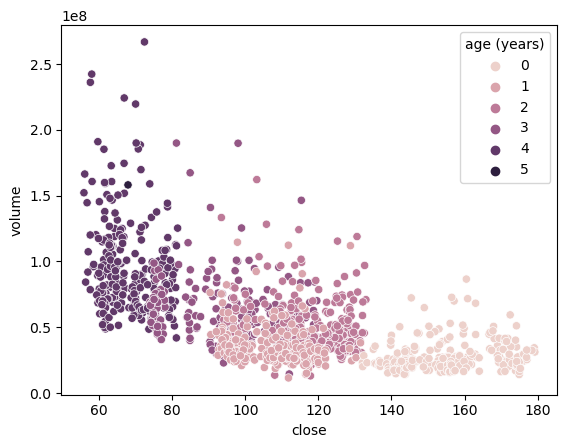

In [3]:
from seaborn import scatterplot
# add a discrete age quantity to put our prices in year buckets
df['age (years)'] = df.index.to_series().apply(lambda x: (df.index.to_series().max() - x).days // 365 )
scatterplot(data=df, x='close', y='volume', hue='age (years)')

The volume/price scatter shows that as prices increase volume declines in pretty clear annual regimes.

Let's look at the volume in dollar terms; we don't have a volume-weighted price, so we have to approximate with one of the prices we have; they're probably equally useful. We also need a float equivalent for time if we want a trendline, so let's make that too.

What we want to see here is if volume still decreases over time if we weight it by price.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


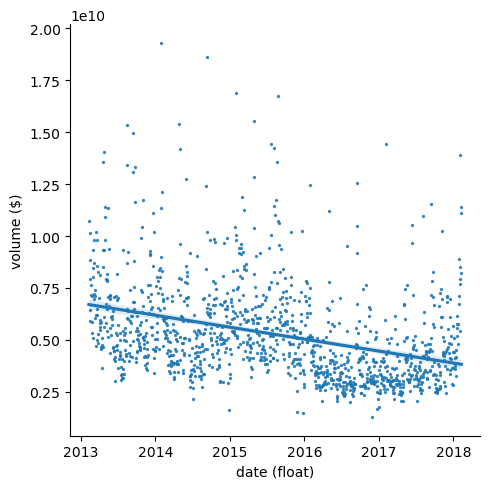

In [4]:
from seaborn import lmplot
from matplotlib.pyplot import tight_layout
# multiply volume by a price to get something like volume in dollars
df['volume ($)'] = df['volume'] * df['close'] # it does not matter which daily price we pick
# we want a trendline so we need a float time; let's shift it to make it look like a year
df['date (float)'] = df.index.to_series().apply(lambda x: 2013 +((x - df.index.to_series().min()).days + 39)/ 365)
lmplot(data=df, x='date (float)', y='volume ($)', scatter_kws={'s': 2},)

Even if we crudely adjust volume for price it declines over time. Now that we have time as a float let's look at the volume and price trends over time.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


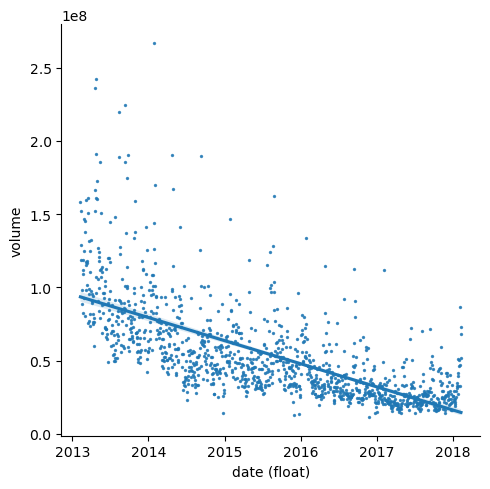

In [5]:
lmplot(data=df, x='date (float)', y='volume', scatter_kws={'s': 2},)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


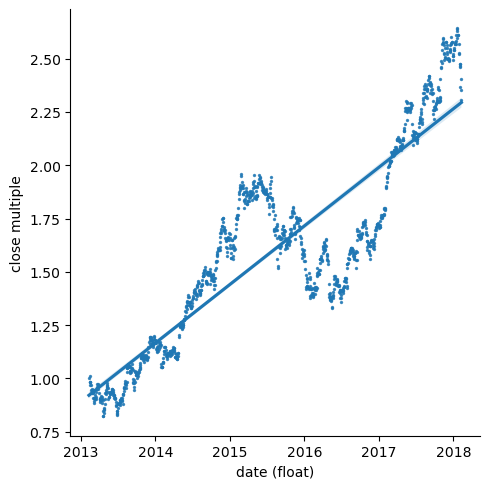

In [6]:
df['close multiple'] = df['close'] / df['close'].values[0]
lmplot(data=df, x='date (float)', y='close multiple', scatter_kws={'s': 2},)